In [1]:
# !pip install mip

In [2]:
!git clone https://github.com/datn2107/fairness-recommendation-system.git
!python3 -m pip install -r fairness-recommendation-system/requirements.txt

Cloning into 'fairness-recommendation-system'...
remote: Enumerating objects: 217, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 217 (delta 41), reused 51 (delta 26), pack-reused 150
Receiving objects: 100% (217/217), 6.51 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (122/122), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 441.8/441.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: cffi
    Found existing installation: cffi 1.16.

In [3]:
!mkdir /content/fairness-recommendation-system/dataset

In [4]:
SAVE_PATH = "/content/drive/MyDrive/Capstone/Dataset"
DATASET_PATH = "/content/fairness-recommendation-system/dataset"

# Get data from drive

In [5]:
# !rm -rf /content/fairness-recommendation-system/dataset/Video_Games

In [6]:
import os
import numpy as np

In [7]:
DATASET = "Office_Products"
CLC_RESULT_VERSION = "CLCRec"
CCFC_RESULT_VERSION = "CCFCRec"

In [8]:
!mkdir {DATASET_PATH}/{DATASET}

In [9]:
if DATASET == "ml-1m":
    interactions = np.load(f"{SAVE_PATH}/{DATASET}/test_cold_interactions.npy")
    interactions_provider = np.array([[interaction[0], interaction[1], 0, 0] for interaction in interactions])
    np.save(f"{SAVE_PATH}/{DATASET}/test_cold_interactions_provider.npy", interactions_provider)

In [16]:
!cp {SAVE_PATH}/{DATASET}/test_cold_items.npy {DATASET_PATH}/{DATASET}
!cp {SAVE_PATH}/{DATASET}/test_cold_interactions.npy {DATASET_PATH}/{DATASET}
!cp {SAVE_PATH}/{DATASET}/test_cold_interactions_provider.npy {DATASET_PATH}/{DATASET}

In [17]:
# if not os.path.exists(f"{SAVE_PATH}/{DATASET}/result/{CLC_RESULT_VERSION}/clcrec_result_formated.npy"):
!cp {SAVE_PATH}/{DATASET}/result/{CLC_RESULT_VERSION}/best_model_ratings.npy {DATASET_PATH}/{DATASET}/clcrec_result.npy
# else:
#     !cp {SAVE_PATH}/{DATASET}/result/{CLC_RESULT_VERSION}/clcrec_result_formated.npy {DATASET_PATH}/{DATASET}/clcrec_result_formated.npy
#     !cp {SAVE_PATH}/{DATASET}/test_cold_interactions_formated.npy {DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy
#     !cp {SAVE_PATH}/{DATASET}/test_cold_interactions_provider_formated.npy {DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy
!cp {SAVE_PATH}/{DATASET}/result/{CCFC_RESULT_VERSION}/best_model_ratings.npy {DATASET_PATH}/{DATASET}/ccfcrec_result.npy

# Run


In [12]:
%cd fairness-recommendation-system

/content/fairness-recommendation-system


In [13]:
!git config pull.rebase true

In [14]:
!git reset --hard
!git pull

HEAD is now at b6f5254 Update evaluation
Already up to date.


In [18]:
# if not os.path.exists(f"{SAVE_PATH}/{DATASET}/result/{CLC_RESULT_VERSION}/clcrec_result_formated.npy") \
#         or not os.path.exists(f"{DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy"):
!python3 formater.py --dataset-name {DATASET} --dataset-dir {DATASET_PATH}
!cp {DATASET_PATH}/{DATASET}/clcrec_result_formated.npy {SAVE_PATH}/{DATASET}/result/{CLC_RESULT_VERSION}
!cp {DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy {SAVE_PATH}/{DATASET}
!cp {DATASET_PATH}/{DATASET}/test_cold_interactions_provider_formated.npy {SAVE_PATH}/{DATASET}
!cp {DATASET_PATH}/{DATASET}/test_cold_interactions_provider_formated.npy {DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy

(16772, 3796)


In [ ]:
!cp {DATASET_PATH}/{DATASET}/clcrec_result_formated.npy {DATASET_PATH}/{DATASET}/clcrec_result.npy
# !cp {DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy {DATASET_PATH}/{DATASET}/test_cold_interactions.npy

In [ ]:
!python3 main.py --dataset-name {DATASET} \
                 --dataset-dir {DATASET_PATH} \
                 --top-k 30 \
                 --reranking \
                 --epsilon 0.05 \
                 --result-path {SAVE_PATH}/{DATASET}/result/result_UMMF.csv \
                 --reranked_output_path {SAVE_PATH}/{DATASET}/result/UMMF_reranked_result_binary.npy\
                 --strategy-name ummf

(CVXPY) May 25 06:30:43 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 06:30:43 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
CLCREC
{'precision': 0.004799730111022511, 'recall': 0.004799730111022511, 'ndcg': 0.0009086327919584184, 'rrq': 1.0, 'p_mmf': 0.13715384677926415, 'W': 12.72418463058857, 'mdg_min_10': 3.4824889031546214e-06, 'mdg_min_20': 1.8307298889929245e-05, 'mdg_min_30': 4.007642724213886e-05, 'mdg_max_10': 0.019154945888961442, 'mdg_max_20': 0.010640778171053673, 'mdg_max_30': 0.007479560269636333, 'u_mmf_5': 0.0, 'u_mmf_10': 0.00869336143308746, 'u_mmf_15': 0.02183585060297389, 'u_pf_5': 0.8285329586699449, 'u_pf_10': 0.

In [ ]:
!python3 main.py --dataset-name {DATASET} \
                 --dataset-dir {DATASET_PATH} \
                 --top-k 30 \
                 --reranking \
                 --epsilon 0.05 \
                 --result-path {SAVE_PATH}/{DATASET}/result/result_UMMF.csv \
                 --reranked_output_path {SAVE_PATH}/{DATASET}/result/UMMF_reranked_result_binary.npy\
                 --strategy-name ummf

(CVXPY) May 25 05:29:29 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 05:29:29 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
CLCREC
{'precision': 0.010272715102812826, 'recall': 0.010271806235624889, 'ndcg': 0.0019138662069087492, 'rrq': 1.0, 'p_mmf': 0.10470884631708856, 'W': 16.00734664757116, 'mdg_min_10': 1.738362020419956e-05, 'mdg_min_20': 4.237200610130928e-05, 'mdg_min_30': 7.257819778877648e-05, 'mdg_max_10': 0.022325903121256787, 'mdg_max_20': 0.012079195133971998, 'mdg_max_30': 0.00838745653758975, 'u_mmf_5': 0.02753195673549656, 'u_mmf_10': 0.06656833824975418, 'u_mmf_15': 0.09452638479187152, 'u_pf_5': 1.5375286791215994, 

In [ ]:
!python3 main.py --dataset-name {DATASET} \
                 --dataset-dir {DATASET_PATH} \
                 --top-k 30 \
                 --reranking \
                 --epsilon 0.05 \
                 --result-path {SAVE_PATH}/{DATASET}/result/result_UMMF.csv \
                 --reranked_output_path {SAVE_PATH}/{DATASET}/result/UMMf_reranked_result_binary.npy\
                 --strategy-name ummf

(CVXPY) May 25 05:16:08 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 05:16:08 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
CLCREC
{'precision': 0.24732591787467278, 'recall': 0.19392962776519265, 'ndcg': 0.20398970895248786, 'rrq': 1.0, 'p_mmf': 0.04231224953189689, 'W': 18.357863198219793, 'mdg_min_10': 9.467914741118296e-05, 'mdg_min_20': 0.00015819976919285924, 'mdg_min_30': 0.00022417716827225333, 'mdg_max_10': 0.12278499154262443, 'mdg_max_20': 0.06292939975618925, 'mdg_max_30': 0.042494206786999715, 'u_mmf_5': 0.039103481163567, 'u_mmf_10': 0.05960896518836433, 'u_mmf_15': 0.06358289620092195, 'u_pf_5': 0.959420487317483, 'u_pf

In [ ]:
!python3 main.py --dataset-name {DATASET} \
                 --dataset-dir {DATASET_PATH} \
                 --top-k 30 \
                 --reranking \
                 --epsilon 0.05 \
                 --result-path {SAVE_PATH}/{DATASET}/result/result_UMMF.csv \
                 --reranked_output_path {SAVE_PATH}/{DATASET}/result/UMMf_reranked_result_binary.npy\
                 --strategy-name ummf

(CVXPY) May 25 04:28:14 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 04:28:14 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
CLCREC
{'precision': 0.06698552569614352, 'recall': 0.06690312605458378, 'ndcg': 0.025929274172936664, 'rrq': 1.0, 'p_mmf': 0.19400750903432035, 'W': 11.953329240588491, 'mdg_min_10': 0.0, 'mdg_min_20': 2.9896852488001588e-06, 'mdg_min_30': 1.637560669150472e-05, 'mdg_max_10': 0.01931137313985693, 'mdg_max_20': 0.01043873549499114, 'mdg_max_30': 0.0072310772682188315, 'u_mmf_5': 0.0, 'u_mmf_10': 0.0, 'u_mmf_15': 0.0, 'u_pf_5': 0.2860784546570083, 'u_pf_10': 0.16596009975062348, 'u_pf_15': 0.13582709891936826, 'ti

In [ ]:
!python3 main.py --dataset-name {DATASET} \
                 --dataset-dir {DATASET_PATH} \
                 --top-k 30 \
                 --reranking \
                 --epsilon 0.05 \
                 --result-path {SAVE_PATH}/{DATASET}/result/result_UMMF.csv \
                 --reranked_output_path {SAVE_PATH}/{DATASET}/result/UMMf_reranked_result_binary.npy\
                 --strategy-name ummf

(CVXPY) May 25 04:19:10 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 04:19:10 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
CLCREC
{'precision': 0.09699844500097758, 'recall': 0.09699562897214145, 'ndcg': 0.037718720294192, 'rrq': 1.0, 'p_mmf': 0.06444622947411913, 'W': 11.786141087485985, 'mdg_min_10': 0.0, 'mdg_min_20': 0.0, 'mdg_min_30': 0.0, 'mdg_max_10': 0.029345406518182956, 'mdg_max_20': 0.015478065244738432, 'mdg_max_30': 0.010555959580093532, 'u_mmf_5': 0.0, 'u_mmf_10': 0.0, 'u_mmf_15': 0.0, 'u_pf_5': 0.15227753046449932, 'u_pf_10': 0.10844278478839385, 'u_pf_15': 0.07417150051710959, 'time': -1}
100% 3714/3714 [03:03<00:00, 

In [ ]:
!python3 p_mmf.py --dataset_dir {DATASET_PATH}/{DATASET}

(CVXPY) May 25 12:21:48 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 12:21:48 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(3714,)
43749.793
11.779696 0.06444622947411913
{'precision': 0.09699844500097758, 'recall': 0.09699562897214145, 'ndcg': 0.037718720294192, 'rrq': 1.0, 'p_mmf': 0.06444622947411913, 'W': 11.786141087485985, 'mdg_min_10': 0.0, 'mdg_min_20': 0.0, 'mdg_min_30': 0.0, 'mdg_max_10': 0.029345406518182956, 'mdg_max_20': 0.015478065244738432, 'mdg_max_30': 0.010555959580093532, 'u_mmf_5': 0.0, 'u_mmf_10': 0.0, 'u_mmf_15': 0.0, 'u_pf_5': 0.15227753046449932, 'u_pf_10': 0.10844278478839385, 'u_pf_15': 0.07417150051710959, 

In [ ]:
!python3 p_mmf.py --dataset_dir {DATASET_PATH}/{DATASET}

(CVXPY) May 25 11:51:29 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) May 25 11:51:29 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.10.4067). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(3714,)
43749.793
11.779696 0.06444622947411913
{'precision': 0.09699844500097758, 'recall': 0.09699562897214145, 'ndcg': 0.037718720294192, 'rrq': 1.0, 'p_mmf': 0.06444622947411913, 'W': 11.786141087485985, 'mdg_min_10': 0.0, 'mdg_min_20': 0.0, 'mdg_min_30': 0.0, 'mdg_max_10': 0.029345406518182956, 'mdg_max_20': 0.015478065244738432, 'mdg_max_30': 0.010555959580093532, 'u_mmf_5': 0.0, 'u_mmf_10': 0.0, 'u_mmf_15': 0.0, 'u_pf_5': 0.15227753046449932, 'u_pf_10': 0.10844278478839385, 'u_pf_15': 0.07417150051710959, 

In [ ]:
import numpy as np

test_cold_items = np.load(f"{DATASET_PATH}/{DATASET}/test_cold_items.npy", allow_pickle=True).item()
test_cold_interactions_provider = np.load(f"{DATASET_PATH}/{DATASET}/test_cold_interactions_provider.npy")
test_cold_interactions_formated = np.load(f"{DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy")

test_cold_items_id = {item_id: id for id, item_id in enumerate(test_cold_items)}
test_cold_interactions_provider_formated = test_cold_interactions_provider.copy()
for i in range(len(test_cold_interactions_provider)):
    test_cold_interactions_provider_formated[i][1] = test_cold_items_id[test_cold_interactions_provider[i][1]]

print(np.array_equal(test_cold_interactions_formated, test_cold_interactions_provider_formated))

TypeError: 'set' object is not subscriptable

# Terminate

In [ ]:
from google.colab import runtime
runtime.unassign()

# Data Analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ccfcrec_result = np.load(f"{DATASET_PATH}/{DATASET}/ccfcrec_result.npy")
clcrec_result = np.load(f"{DATASET_PATH}/{DATASET}/clcrec_result_formated.npy")

test_cold_interactions = np.load(f"{DATASET_PATH}/{DATASET}/test_cold_interactions_formated.npy")
test_cold_items = np.load(f"{DATASET_PATH}/{DATASET}/test_cold_items.npy", allow_pickle=True).item()

In [ ]:
n_users, n_items = ccfcrec_result.shape[:2]
interactions_matrix = np.zeros((n_users, n_items))
for user_id, items in test_cold_interactions:
    interactions_matrix[user_id, items] = 1

In [ ]:
print(interactions_matrix.shape)

(31027, 3390)


In [ ]:
users_cnt = np.sum(interactions_matrix, axis=1)

In [ ]:
print(np.min(users_cnt))
print(np.max(users_cnt))
print(np.percentile(users_cnt, 50))
print(np.sum(users_cnt == 0))

0.0
85.0
1.0
13999


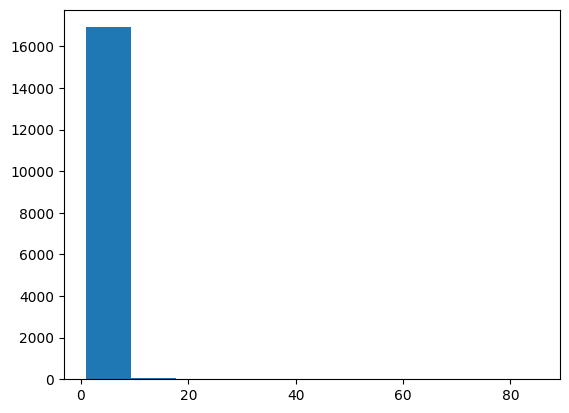

In [ ]:
plt.hist(users_cnt, range=(1, np.max(users_cnt)))
plt.show()

In [ ]:
items_cnt = np.sum(interactions_matrix, axis=0)

In [ ]:
print(np.min(items_cnt))
print(np.max(items_cnt))
print(np.percentile(items_cnt, 25))
print(np.sum(items_cnt < 5))

1.0
313.0
1.0
2179


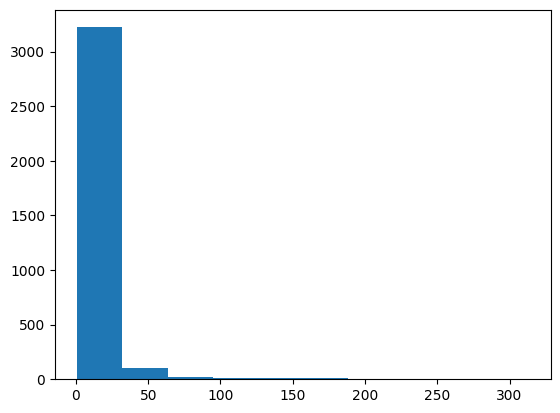

In [ ]:
plt.hist(items_cnt)
plt.show()

## Model Result

# Test


In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from mip import Model, xsum, maximize, BINARY

## Data Preprocessing

In [ ]:
def normalize(S: np.ndarray, base_val: float = 0) -> np.ndarray:
    S = S - np.min(S) + base_val
    S = S / (np.max(S) -  np.min(S))

    return S


def normalize_by_row(S: np.ndarray, base_val: float = 0) -> np.ndarray:
    S = S - np.min(S, axis=1)[:, None] + base_val
    S = S / (np.max(S, axis=1) - np.min(S, axis=1))[:, None]

    return S


def preprocess_clcrec_result(S: np.ndarray) -> np.ndarray:
    S = normalize(S)

    return S


def preprocess_ccfcrec_result(S: np.ndarray) -> np.ndarray:
    ranking = np.argsort(S, axis=0)
    ranking_col_idx = np.tile(np.arange(S.shape[1]), (S.shape[0], 1))

    S[ranking, ranking_col_idx] = np.tile(np.arange(S.shape[0]), (S.shape[1], 1)).T
    S = normalize(S, 0.01)

    return S


def divide_group(B: np.ndarray, group_p: float) -> np.ndarray:
    n_items = B.shape[1]
    items_cnt = np.sum(B, axis=0)
    items_idx = np.argsort(items_cnt)

    group_size = int(n_items * group_p)
    group_items = items_idx[:group_size], items_idx[group_size:]

    return group_items

## Optimizer


In [ ]:
def fairness_optimisation_custom(S, k, epsilon):
    n_user = S.shape[0]
    n_item = S.shape[1]

    model = Model()

    W = [[model.add_var() for j in range(n_item)] for i in range(n_user)]

    model.objective = maximize(xsum((S[i][j] * W[i][j]) for i in range(n_user) for j in range(n_item)))

    for i in range(n_user):
        model += xsum(W[i][j] for j in range(n_item)) == k

    for j in range(n_item):
        model += epsilon <= xsum(W[i][j] for i in range(n_user))

    for i in range(n_user):
        for j in range(n_item):
            model += W[i][j] <= 1

    model.optimize()

    return W

## Format


In [ ]:
%cd fairness-recommendation-system

/content/fairness-recommendation-system


In [ ]:
!make format DATASET-NAME={DATASET} DATASET-DIR={DATASET_PATH}

python3 formater.py --dataset-name Office_Products_Filtered --dataset-dir /content/fairness-recommendation-system/dataset
(16772, 3796)


In [ ]:
%cd ..

/content


## Optimize

In [ ]:
clcrec_result = np.load(f"{DATASET_PATH}/{DATASET}/clcrec_result_formated.npy")
clcrec_result = clcrec_result * 10000
clcrec_result = preprocess_clcrec_result(clcrec_result)

In [ ]:
print(np.min(clcrec_result))
print(np.max(clcrec_result))

0.0
1.0


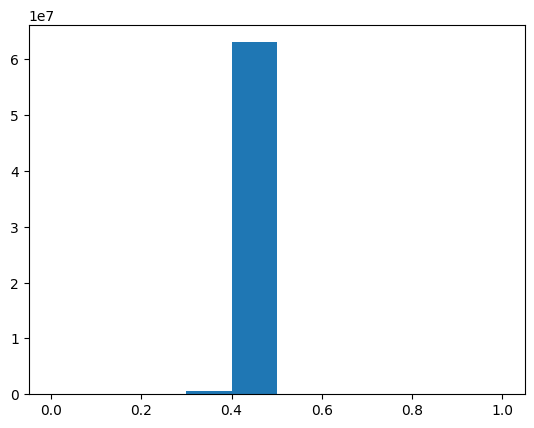

In [ ]:
plt.hist(clcrec_result.flatten())
plt.show()

In [ ]:
b = np.zeros_like(clcrec_result, dtype=np.int32)
for i in range(clcrec_result.shape[0]):
    b[i, np.argsort(clcrec_result[i, :])[-30:]] = 1

print(np.argsort(clcrec_result, axis=1)[:, -30:].shape)
print(b.shape)
print(np.unique(b))

(16772, 30)
(16772, 3796)
[0 1]


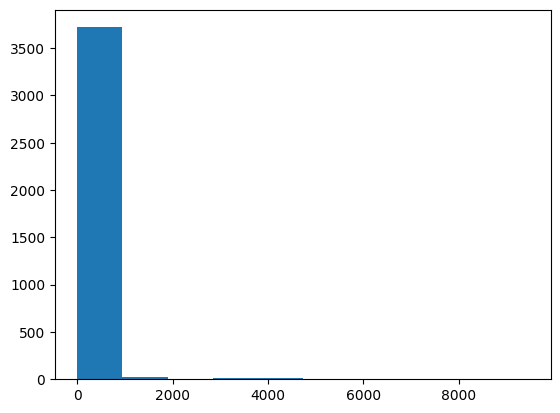

In [ ]:
items_cnt = np.sum(b, axis=0)
plt.hist(items_cnt)
plt.show()

In [ ]:
W = fairness_optimisation_custom(clcrec_result[:3000], 30, 15)
W_np = np.array([[W[i][j].x for j in range(clcrec_result.shape[1])] for i in range(3000)])

In [ ]:
print(W_np.shape)

In [ ]:
items_cnt = np.sum(W_np, axis=0)
plt.hist(items_cnt)
plt.show()

# Statistic


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def normalize(S: np.ndarray, base_val: float = 0) -> np.ndarray:
    """
    Normalize the score matrix.

    Parameters:
    S (np.ndarray): The score matrix of shape (n_users, n_items).
    base_val (float): The base value to add to the score matrix to avoid value 0.

    Returns:
    The normalized score matrix.
    """
    S = S - np.min(S) + base_val
    S = S / (np.max(S) -  np.min(S))

    return S

def preprocess_clcrec_result(S: np.ndarray) -> np.ndarray:
    """
    Preprocess the CLCRec result.

    Parameters:
    S (np.ndarray): The predicted score matrix of shape (n_users, n_items).

    Returns:
    The preprocessed score matrix.
    """
    S = normalize(S)

    return S


def preprocess_ccfcrec_result(S: np.ndarray) -> np.ndarray:
    """
    Preprocess the CCF-Rec result.

    Parameters:
    S (np.ndarray): The predicted score matrix of shape (n_users, n_items).

    Returns:
    The preprocessed score matrix.
    """
    ranking = np.argsort(S, axis=0)
    ranking_col_idx = np.tile(np.arange(S.shape[1]), (S.shape[0], 1))

    S[ranking, ranking_col_idx] = np.tile(np.arange(S.shape[0]), (S.shape[1], 1)).T
    S = normalize(S, 0.01)

    return S

In [ ]:
S = np.load("/content/fairness-recommendation-system/dataset/Office_Products_Filtered/ccfcrec_result.npy")
S = preprocess_ccfcrec_result(S)

In [ ]:
S = np.load("/content/fairness-recommendation-system/dataset/Office_Products_Filtered/clcrec_result_formated.npy")
S = preprocess_clcrec_result(S)

In [ ]:
print(S.shape)

(16772, 3796)


In [ ]:
R = np.zeros_like(S)
for i in range(S.shape[0]):
    R[i, np.argsort(S[i, :])[-30:]] = 1

In [ ]:
users_cnt = np.sum(R, axis=1)
print(users_cnt.shape)
print(users_cnt)

(16772,)
[30. 30. 30. ... 30. 30. 30.]


In [ ]:
items_cnt = np.sum(R, axis=0)
print(items_cnt.shape)

(3796,)


0.0
9464.0
(3796,)
1754


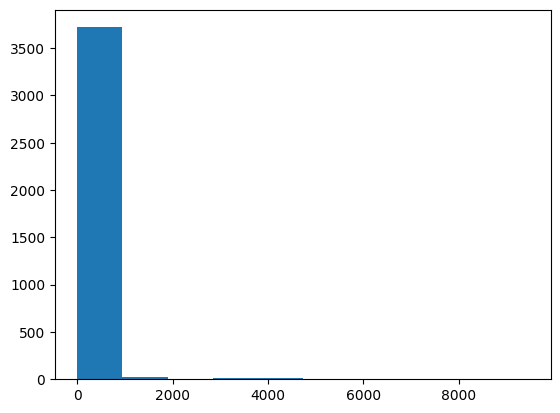

In [ ]:
print(np.min(items_cnt))
print(np.max(items_cnt))
print(items_cnt.shape)
print(np.sum(items_cnt < 20))
plt.hist(items_cnt)
plt.show()

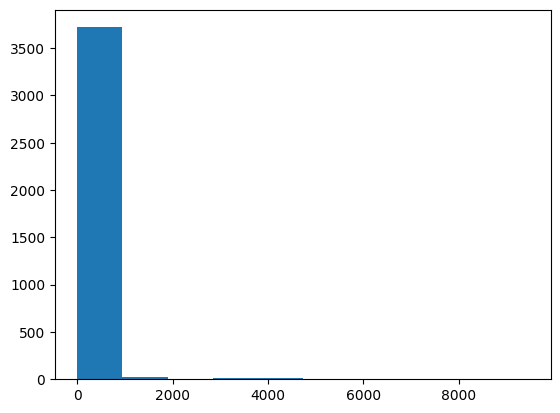

In [ ]:
plt.hist(items_cnt)
plt.show()

# Terminate

In [ ]:
from google.colab import runtime
runtime.unassign()